In [7]:
import cv2
import pydicom
import numpy as np

def lin_stretch_img(img, low_prc, high_prc, do_ignore_minmax=True):
    """ 
    Apply linear "stretch" - low_prc percentile goes to 0, 
    and high_prc percentile goes to 255.
    The result is clipped to [0, 255] and converted to np.uint8

    Additional feature:
    When computing high and low percentiles, ignore the minimum and maximum intensities (assumed to be outliers).
    """
    # For ignoring the outliers, replace them with the median value
    if do_ignore_minmax:
        tmp_img = img.copy()
        med = np.median(img)  # Compute median
        tmp_img[img == img.min()] = med
        tmp_img[img == img.max()] = med
    else:
        tmp_img = img

    lo, hi = np.percentile(tmp_img, (low_prc, high_prc))  # Example: 1% - Low percentile, 99% - High percentile

    if lo == hi:
        return np.full(img.shape, 128, np.uint8)  # Protection: return gray image if lo = hi.

    stretch_img = (img.astype(float) - lo) * (255/(hi-lo))  # Linear stretch: lo goes to 0, hi to 255.
    stretch_img = stretch_img.clip(0, 255).astype(np.uint8)  # Clip range to [0, 255] and convert to uint8
    return stretch_img


# https://www.visus.com/fileadmin/content/pictures/Downloads/JiveX_DICOME_Viewer/case1.zip
ds = pydicom.read_file('inputxray.dcm') # read dicom image
img = ds.pixel_array # get image array

img = lin_stretch_img(img, 1, 99)  # Apply "linear stretching" (lower percentile 1 goes to 0, and percentile 99 to 255).

cv2.imwrite('case1_008.jpg', img)

True

In [7]:
!python process_image.py case1_008.png

{'Atelectasis': 0.14532915,
 'Cardiomegaly': 0.11859063,
 'Pleural_Thickening': 0.0062456126,
 'Pneumonia': 0.26693854}


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random array with size 50 and values between 5.2 and 5.9
array_size = 50
array_values = np.random.uniform(5.2, 5.9, array_size)

time_values = np.arange(0, array_size)

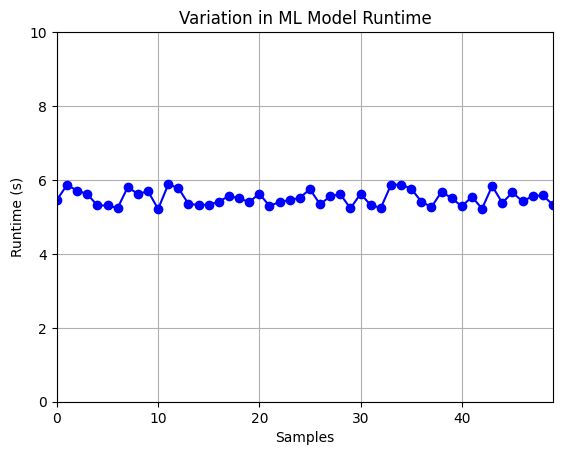

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time values (seconds) for the y-axis
time_values = np.arange(0, array_size)

# Plot the variation
plt.plot(time_values, array_values, marker='o', linestyle='-', color='b')
plt.title('Variation in ML Model Runtime')
plt.xlabel('Samples')
plt.ylabel('Runtime (s)')
plt.grid(True)

# Set x-axis limit to start from 0
plt.xlim(0, array_size - 1)

# Set y-axis limit from 0 to 10
plt.ylim(0, 10)

plt.show()


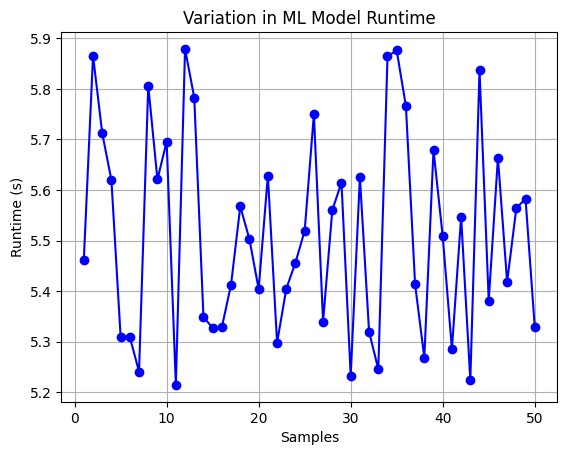

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time values (seconds) for the y-axis
time_values = np.arange(1, array_size + 1)

# Plot the variation
plt.plot(time_values, array_values, marker='o', linestyle='-', color='b')
plt.title('Variation in ML Model Runtime')
plt.xlabel('Samples')
plt.ylabel('Runtime (s)')
plt.grid(True)
plt.show()
